In [3]:
import pandas as pd
import numpy as np

import joblib
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
def train_naive_bayes(labels,unique_classes, bag_of_words):   

    prior_prob = np.empty(len(labels))
    vocab = []
    words_in_label = np.empty(len(labels))
    for label_index,label in enumerate(unique_classes):
        prior_prob[label_index] = np.sum(labels == label) / float(len(labels))
        words_in_label[label_index]=np.sum(np.array(list(bag_of_words[label_index].values())))
        vocab += bag_of_words[label_index].keys()
    vocab = np.unique(np.array(vocab))
    likelihood_dividor = np.array([words_in_label[label_index]+len(vocab) for label_index, label in enumerate(unique_classes)])
    lookup_table =[]
    for label_index, label in enumerate(unique_classes):
        lookup_table.append((bag_of_words[label_index],prior_prob[label_index],likelihood_dividor[label_index]))
    return lookup_table

In [4]:
# 80 20

bag_of_wrds_80_20 = joblib.load("selected_features_80_20")
train_80_20 = pd.read_csv("train_80_20_split.csv")
test_80_20 = pd.read_csv("test_80_20_split.csv")
LE = preprocessing.LabelEncoder()
train_80_20['label'] = LE.fit_transform(train_80_20['label'].values)
lookup_table_80_20 = train_naive_bayes(train_80_20['label'].values, list(set(train_80_20['label'].values)), bag_of_wrds_80_20)

In [5]:
lookup_table_80_20

[({'jpeg': 673,
   'graphic': 538,
   'image': 1562,
   'gif': 331,
   'pixel': 151,
   'tiff': 132,
   'polygon': 129,
   'xv': 112,
   'animation': 111,
   'conversion': 110,
   'output': 104,
   'shareware': 101,
   'viewer': 175,
   'quicktime': 94,
   'amiga': 92,
   'sgi': 88,
   'mac': 153,
   'directory': 153,
   'interface': 84,
   'compression': 82,
   'ftp': 254,
   'postscript': 79,
   'zip': 78,
   'workstation': 78,
   'vesa': 78,
   'visualization': 77,
   'format': 542,
   'algorithm': 130,
   'screen': 126,
   'driver': 126,
   'gopher': 71,
   'vga': 70,
   'simtel': 69,
   'archive': 117,
   'hardware': 116,
   'rayshade': 66,
   'phigs': 66,
   'server': 115,
   'hacker': 64,
   'compress': 63,
   'colour': 110,
   'quantization': 62,
   'color': 440,
   'siggraph': 59,
   'menu': 59,
   'filter': 58,
   'tracer': 57,
   'interactive': 57,
   'software': 408,
   'gifs': 56,
   'texture': 55,
   'byte': 55,
   'version': 389,
   'pc': 167,
   'vertex': 51,
   'card':

In [6]:
joblib.dump(lookup_table_80_20,"lookup_table_80_20")

['lookup_table_80_20']

In [8]:
len(lookup_table_80_20[1][0].keys())

300

In [53]:
joblib.dump(lookup_table_80_20,'lookup_table_80_20')

['lookup_table_80_20']

In [26]:
def test_naive_bayes(sentence):
    likelihood = np.zeros(len(unique_classes))
    words = [str(word) for word in sentence.split(" ")]
    for label_index,index in enumerate(unique_classes):
        for word in words:
            # likelihood = count(word)+1 / vocab + word_counts_in_class
            likelihood[label_index] += np.log((lookup_table_80_20[label_index][0].get(word,0)+1) /(float(lookup_table_80_20[label_index][2])))
    posterior = np.empty(len(unique_classes))
    for label_index,label in enumerate(unique_classes):
        posterior[label_index] = np.log(lookup_table_80_20[label_index][1])+ likelihood[label_index]
    return unique_classes[np.argmax(posterior)]

In [27]:
unique_classes=list(set(train_80_20['label'].values))

In [31]:
test_80_20['text'] = test_80_20['text'].astype(str)

In [32]:
predictions = test_80_20['text'].apply(lambda x: test_naive_bayes(x))

In [38]:
predictions.values

array([2, 0, 4, 4, 4, 1, 3, 0, 2, 3, 3, 2, 2, 3, 2, 0, 0, 2, 2, 1, 1, 4,
       2, 4, 2, 2, 1, 1, 1, 3, 3, 1, 0, 1, 2, 3, 1, 3, 0, 4, 1, 2, 3, 3,
       0, 2, 2, 2, 4, 4, 3, 1, 3, 3, 2, 2, 2, 0, 3, 3, 4, 2, 2, 0, 4, 2,
       3, 2, 2, 3, 4, 3, 2, 2, 4, 2, 3, 4, 2, 2, 2, 0, 1, 1, 0, 3, 3, 1,
       2, 3, 1, 1, 2, 3, 2, 1, 0, 2, 3, 4, 3, 4, 4, 2, 3, 1, 1, 3, 2, 2,
       0, 0, 2, 2, 4, 1, 4, 2, 1, 2, 2, 3, 1, 3, 4, 0, 4, 1, 2, 4, 2, 2,
       2, 0, 1, 4, 1, 2, 3, 3, 0, 3, 3, 2, 2, 1, 0, 1, 3, 4, 3, 4, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 0, 3, 2, 4, 1, 0, 3, 4, 3, 1, 0, 3, 4, 1, 3,
       4, 4, 0, 2, 2, 1, 1, 4, 4, 0, 2, 3, 2, 3, 3, 2, 4, 2, 3, 0, 1, 1,
       3, 3, 0, 2, 4, 4, 3, 1, 4, 0, 1, 1, 2, 2, 0, 2, 2, 1, 2, 3, 3, 2,
       4, 0, 3, 3, 1, 0, 3, 2, 4, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0, 0, 4, 2,
       2, 1, 2, 4, 4, 3, 1, 2, 2, 4, 4, 3, 3, 4, 2, 1, 3, 1, 2, 1, 4, 4,
       4, 3, 2, 4, 4, 2, 2, 3, 1, 1, 0, 0, 3, 2, 4, 0, 2, 3, 0, 1, 2, 3,
       3, 0, 2, 0, 2, 2, 0, 2, 4, 2, 1, 1, 4, 4, 2,

In [40]:
test_labels = LE.transform(test_80_20['label'].values)
test_labels

array([2, 0, 4, 4, 1, 1, 1, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 2, 2, 1, 1, 4,
       2, 4, 2, 4, 1, 1, 1, 0, 0, 1, 0, 1, 2, 3, 1, 3, 0, 4, 1, 2, 4, 4,
       0, 2, 4, 2, 4, 4, 3, 1, 3, 3, 4, 0, 2, 0, 1, 3, 4, 2, 2, 0, 4, 2,
       3, 4, 2, 0, 4, 3, 2, 2, 4, 2, 3, 4, 2, 4, 2, 0, 1, 1, 0, 3, 1, 1,
       2, 3, 1, 1, 2, 3, 2, 1, 0, 4, 3, 4, 4, 4, 4, 2, 3, 1, 2, 3, 2, 2,
       0, 0, 1, 3, 4, 1, 4, 0, 1, 4, 3, 3, 1, 3, 4, 0, 4, 1, 0, 4, 2, 2,
       4, 0, 1, 4, 1, 2, 3, 3, 0, 3, 3, 4, 2, 1, 0, 1, 1, 4, 3, 4, 1, 1,
       1, 1, 1, 4, 4, 2, 0, 0, 0, 2, 4, 1, 0, 3, 4, 0, 1, 0, 3, 4, 1, 3,
       4, 4, 0, 2, 4, 1, 1, 4, 4, 0, 2, 3, 2, 3, 3, 4, 4, 2, 3, 0, 1, 1,
       3, 3, 0, 2, 4, 4, 3, 1, 4, 0, 1, 1, 2, 1, 0, 1, 2, 0, 2, 3, 0, 2,
       4, 0, 1, 3, 1, 0, 3, 2, 4, 1, 3, 2, 2, 2, 2, 2, 2, 2, 0, 0, 4, 2,
       4, 1, 2, 4, 4, 3, 1, 0, 2, 4, 4, 3, 3, 4, 2, 1, 3, 1, 2, 1, 4, 4,
       4, 0, 0, 4, 4, 1, 2, 3, 1, 1, 0, 0, 3, 2, 4, 0, 2, 3, 0, 1, 2, 3,
       3, 0, 3, 0, 2, 2, 0, 2, 4, 0, 1, 1, 4, 4, 2,

In [41]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(accu, average='macro')

(0.8881407872362566, 0.8477962832126117, 0.8558527554029005, None)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,predictions.values)

0.853

In [50]:
def accuracy_per_class(preds_flat, labels_flat):

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {LE.inverse_transform([label])}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [51]:
accuracy_per_class(test_labels,predictions.values)

Class: ['comp.graphics']
Accuracy: 155/162

Class: ['rec.sport.hockey']
Accuracy: 172/175

Class: ['sci.med']
Accuracy: 212/309

Class: ['sci.space']
Accuracy: 186/224

Class: ['talk.politics.misc']
Accuracy: 128/130



/home/venktesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


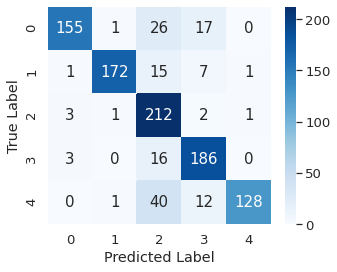

In [52]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, predictions.values)

df_cm = pd.DataFrame(conf_mat)
fig = plt.figure(figsize=(5,4))
class_names= [0,1,2,3,4]
ax = sn.set(font_scale=1.2) # for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt='g') # font size
ax.set(xlabel='Predicted Label', ylabel='True Label')
# labels, title and ticks
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
fig.show()

In [54]:
# 80 20

bag_of_wrds_70_30 = joblib.load("selected_features_70_30")
train_70_30 = pd.read_csv("train_70_30_split.csv")
test_70_30 = pd.read_csv("test_70_30_split.csv")
LE = preprocessing.LabelEncoder()
train_70_30['label'] = LE.fit_transform(train_70_30['label'].values)
lookup_table_70_30 = train_naive_bayes(train_70_30['label'].values, list(set(train_70_30['label'].values)), bag_of_wrds_70_30)

In [55]:
joblib.dump(lookup_table_70_30,'lookup_table_70_30')

['lookup_table_70_30']

In [56]:
test_70_30['text'] = test_70_30['text'].astype(str)

In [58]:
set(test_70_30['label'].values)

{'comp.graphics',
 'rec.sport.hockey',
 'sci.med',
 'sci.space',
 'talk.politics.misc'}

In [59]:
predictions = test_70_30['text'].apply(lambda x: test_naive_bayes(x))

In [63]:
test_labels = LE.transform(test_70_30['label'].values)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,predictions.values)

0.8353333333333334

In [65]:
accuracy_per_class(test_labels,predictions.values)

Class: ['comp.graphics']
Accuracy: 237/250

Class: ['rec.sport.hockey']
Accuracy: 259/261

Class: ['sci.med']
Accuracy: 274/437

Class: ['sci.space']
Accuracy: 259/323

Class: ['talk.politics.misc']
Accuracy: 224/229



/home/venktesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


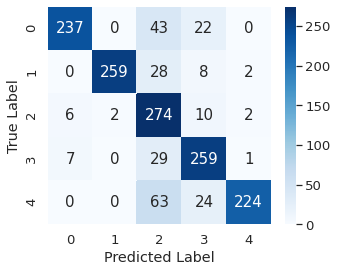

In [66]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, predictions.values)

df_cm = pd.DataFrame(conf_mat)
fig = plt.figure(figsize=(5,4))
class_names= [0,1,2,3,4]
ax = sn.set(font_scale=1.2) # for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt='g') # font size
ax.set(xlabel='Predicted Label', ylabel='True Label')
# labels, title and ticks
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
fig.show()

In [68]:
# 80 20

bag_of_wrds_50_50 = joblib.load("selected_features_50_50")
train_50_50 = pd.read_csv("train_50_50_split.csv")
test_50_50 = pd.read_csv("test_50_50_split.csv")
LE = preprocessing.LabelEncoder()
train_50_50['label'] = LE.fit_transform(train_50_50['label'].values)
lookup_table_50_50 = train_naive_bayes(train_50_50['label'].values, list(set(train_50_50['label'].values)), bag_of_wrds_50_50)

In [73]:
test_50_50['text'] = test_50_50['text'].astype(str)

In [74]:
set(test_50_50['label'].values)

{'comp.graphics',
 'rec.sport.hockey',
 'sci.med',
 'sci.space',
 'talk.politics.misc'}

In [75]:
predictions = test_50_50['text'].apply(lambda x: test_naive_bayes(x))

In [77]:
test_labels = LE.transform(test_50_50['label'].values)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,predictions.values)

0.8556

In [79]:
accuracy_per_class(test_labels,predictions.values)

Class: ['comp.graphics']
Accuracy: 381/398

Class: ['rec.sport.hockey']
Accuracy: 427/430

Class: ['sci.med']
Accuracy: 525/759

Class: ['sci.space']
Accuracy: 457/554

Class: ['talk.politics.misc']
Accuracy: 349/359



/home/venktesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


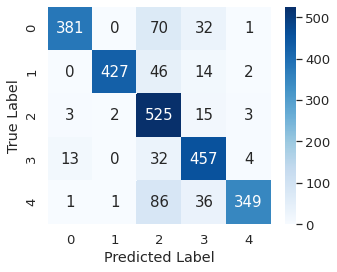

In [80]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, predictions.values)

df_cm = pd.DataFrame(conf_mat)
fig = plt.figure(figsize=(5,4))
class_names= [0,1,2,3,4]
ax = sn.set(font_scale=1.2) # for label size
ax = sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt='g') # font size
ax.set(xlabel='Predicted Label', ylabel='True Label')
# labels, title and ticks
ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
fig.show()